In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

links= pd.read_csv('/content/links.csv')
movies= pd.read_csv('/content/movies.csv')
ratings= pd.read_csv('/content/ratings.csv')
tags= pd.read_csv('/content/tags.csv')

# creating pivot table to create item by item collaborative filtering
user_pivot = pd.pivot_table(data=ratings, values='rating', index='userId', columns='movieId')
user_pivot.head()

user_pivot.fillna(0, inplace=True)

In [ ]:
user_pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train - Test split



In [ ]:
np.nonzero(np.array(user_pivot))

(array([  0,   0,   0, ..., 609, 609, 609]),
 array([   0,    2,    5, ..., 9444, 9445, 9485]))

In [ ]:
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(user_pivot)), # find out all the positions different than 0
).T
# ratings_pos.columns = ["row_pos", "column_pos"]

ratings_pos.head(8)

,0,1
0,0,0
1,0,2
2,0,5
3,0,43
4,0,46
5,0,62
6,0,89
7,0,97


In [ ]:
user_pivot.iloc[0:1, [2, 5, 43, 46, 62]]

movieId,3,6,47,50,70
userId,,,,,
1,4.0,4.0,5.0,5.0,3.0


In [ ]:
len(ratings_pos)

100836

#### 2nd step: Create the train and test

In [ ]:
# split with train and test
from sklearn.model_selection import train_test_split
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)

These values will go to the train set:

In [ ]:
train_pos.sort_values([0,1]).head(6)

,0,1
0,0,0
1,0,2
3,0,43
4,0,46
5,0,62
6,0,89


...and these to the test set:

In [ ]:
test_pos.sort_values([0,1]).head(6)

,0,1
2,0,5
43,0,632
54,0,787
62,0,827
68,0,897
81,0,938


In [ ]:
pd.DataFrame(np.zeros(user_pivot.shape))

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_pos.values

array([[ 609, 2978],
       [ 379,  938],
       [ 602,   96],
       ...,
       [ 110, 8140],
       [ 191,  508],
       [ 102, 2102]])

In [ ]:
# create an empty arrays full of 0, with the same shape as the users-items data
train = np.zeros(user_pivot.shape)

# fill the set with the ratings based on the train positions
for pos in train_pos.values: 
    index = pos[0]
    col = pos[1]
    train[index, col] = user_pivot.iloc[index, col]

# convert arrays to dataframe
train = pd.DataFrame(train, 
                     columns=user_pivot.columns, 
                     index=user_pivot.index)

train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.iloc[0:1, [2, 5, 43, 46, 62]]

movieId,3,6,47,50,70
userId,,,,,
1,4.0,0.0,5.0,5.0,3.0


Now it is time for the test set. We will follow the same process

In [ ]:
test = np.zeros(user_pivot.shape)

for pos in test_pos.values: 
    index = pos[0]
    col = pos[1]
    test[index, col] = user_pivot.iloc[index, col]
    
test = pd.DataFrame(test, 
                    columns=user_pivot.columns, 
                    index=user_pivot.index)

How many ratings from our user `1` fell into the train set?

In [ ]:
test.iloc[0:1, [2, 5, 43, 46, 62]]

movieId,3,6,47,50,70
userId,,,,,
1,0.0,4.0,0.0,0.0,0.0


We can build a compact dataframe to store the positions of all the places in the test set and their true rating:

In [ ]:
true_test_ratings = []

for row in test_pos.iterrows():
    true_test_ratings.append(user_pivot.iloc[int(row[1][0]), int(row[1][1])])

In [ ]:
test_pos = test_pos.assign(true_rating = true_test_ratings)

In [ ]:
test_pos.head()

,0,1,true_rating
16705,104,7306,5.0
3692,21,3012,4.5
74367,473,3578,3.0
49894,318,8945,4.5
84800,549,8532,4.5


#### 3rd step: build the similarity matrix for the train set

In [ ]:
# train the model
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.015234,0.067484,0.171337,0.128902,0.121473,0.131189,0.148958,0.072979,0.010804,...,0.079137,0.157330,0.198989,0.066681,0.159430,0.140858,0.235214,0.276807,0.101351,0.116009
2,0.015234,1.000000,0.000000,0.004214,0.018637,0.016235,0.011991,0.030243,0.000000,0.050912,...,0.207869,0.000000,0.013404,0.000000,0.000000,0.023669,0.014767,0.035786,0.030461,0.094330
3,0.067484,0.000000,1.000000,0.002577,0.005698,0.004467,0.000000,0.005548,0.000000,0.000000,...,0.005641,0.005635,0.027755,0.000000,0.012096,0.014869,0.022211,0.023929,0.000000,0.028087


#### 4th step: Predict rating for a single place of the test set

We will look at the restaurant `placeID=135039` and user `U1001` - the data value in position `[0, 85]`

We use only the ratings on the train set, and the similarity matrix computed only from the train set:

In [ ]:
results = (
    pd.DataFrame({
        'ratings': train.loc[:,6], 
        'similarities' : train_similarity.loc[1,:].tolist()
    })
)
results.head()

,ratings,similarities
userId,,
1,0.0,1.000000
2,0.0,0.015234
3,0.0,0.067484
4,0.0,0.171337
5,0.0,0.128902


As always, we compute the weights from the similarities:

In [ ]:
results = results.assign(weights = results.similarities / (sum(results.similarities)-1))

In [ ]:
results.head(3)

,ratings,similarities,weights
userId,,,
1,0.0,1.000000,0.013476
2,0.0,0.015234,0.000205
3,0.0,0.067484,0.000909


Then we weight the rating that each user gave to that place with each user's weight:

In [ ]:
results = results.assign(weighted_ratings = results.ratings * results.weights)
results.head(3)

,ratings,similarities,weights,weighted_ratings
userId,,,,
1,0.0,1.000000,0.013476,0.0
2,0.0,0.015234,0.000205,0.0
3,0.0,0.067484,0.000909,0.0


In [ ]:
pred_rating = results.weighted_ratings.sum()
pred_rating

0.8581117237534173

Real rating for user 1 for the place `135039`:

In [ ]:
true_rating = user_pivot.loc[1, 6]
true_rating

4.0

We can compute the error as the true rating minus the predicted rating:

In [ ]:
error = true_rating - pred_rating
error

3.1418882762465827

Now we just need to do that for all of the places in the test set, and compute the performance metrics.

## Computing all recommendations for the test set

We will build a function that computes the ratings for a single user and a single movie

In [ ]:
def recommender(index_pos, column_pos): 
    # build a df with the ratings for one place (column_name) and
    # the similarities to one user (index_name)
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:].tolist()
      })
    )
    
    # compute the weights
    results = results.assign(weights = results.similarities / (sum(results.similarities) -1))
    
    # compute the weighted ratings
    results = results.assign(weighted_ratings = results.ratings * results.weights)
    
    # return rating prediction for one user and one movie
    return results.weighted_ratings.sum()

In [ ]:
recommender(0, 6)

0.29740147830319413

In [ ]:
test_pos.sort_values([0, 1])

,0,1,true_rating
2,0,5,4.0
43,0,632,4.0
54,0,787,3.0
62,0,827,5.0
68,0,897,5.0
...,...,...,...
100755,609,8817,3.0
100767,609,8899,3.5
100774,609,8945,3.5
100787,609,9016,4.0


Let's store the recommendations on a list:

In [ ]:
recs_test = []

for row in test_pos.iterrows():
    recs_test.append(
        recommender(
            index_pos = int(row[1][0]), 
            column_pos = int(row[1][1])
        )
    )

In [ ]:
recs_test

[0.13738514853619432,
 0.672705712414964,
 0.0384311353186764,
 0.064934960384987,
 0.3512117776251406,
 0.8304882708641449,
 0.0,
 0.3994500714329324,
 2.091306067111637,
 0.18728357397204892,
 0.3830114339631542,
 0.14696745832084257,
 0.16768532878319786,
 0.08650932509877515,
 0.024820846597749656,
 0.5474269462214028,
 1.080280192796685,
 0.7642108028178435,
 0.4223766489464252,
 0.36231656166760495,
 1.4789464623283877,
 0.017235829369024902,
 0.549972553995237,
 1.2386916933661634,
 0.011798391081323568,
 1.5204941310869957,
 0.005034769796349974,
 1.24375846649042,
 0.6757293888093214,
 0.055673239188772025,
 0.31243722892391246,
 1.213868470165607,
 0.7406677968759732,
 0.37861645937079846,
 0.8178403644990027,
 0.011114330946724309,
 0.3008807369822837,
 1.4937484034659296,
 0.06729255772469359,
 0.0,
 0.17961117649263134,
 0.13623853629380456,
 0.5724618729715213,
 0.6176179467685993,
 0.13097599782586694,
 0.2619001406729159,
 0.1871083097726966,
 0.20808571254621583,
 0.19

And we assign the list as a column of the `test_pos` dataframe:

In [ ]:
test_pos = test_pos.assign(pred_rating = recs_test)

In [ ]:
test_pos.head()

,0,1,true_rating,pred_rating
16705,104,7306,5.0,0.137385
3692,21,3012,4.5,0.672706
74367,473,3578,3.0,0.038431
49894,318,8945,4.5,0.064935
84800,549,8532,4.5,0.351212


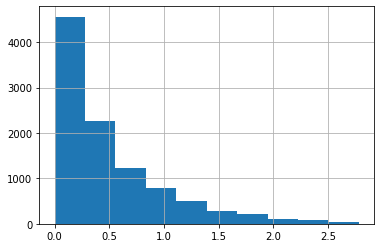

In [ ]:
test_pos.pred_rating.hist();

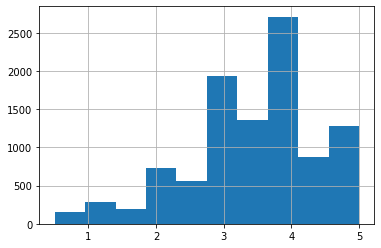

In [ ]:
test_pos.true_rating.hist();

## Performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

3.00644891379616

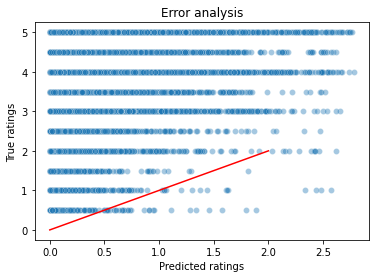

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = test_pos.pred_rating
true_values = test_pos.true_rating

plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')
sns.lineplot(x=[0,2], y=[0,2], color='red')
sns.scatterplot(x=predictions, y=true_values, alpha=0.4)
plt.show()

We know that our model won't be capable of exact predictions, but this doesn't matter for predictions. What we need is to be able to rank items from most likely to be enjoyed to least. So let's have a quick look to see if overall the predicted values for true values of 2 are higher than the predicted values for true values of one

Average predicted score for the true rating of 2

In [ ]:
test_pos.loc[test_pos.true_rating==2,:]["pred_rating"].mean()

0.3271610772467777

Average predicted score for the true rating of 1

In [ ]:
test_pos.loc[test_pos.true_rating==1,:]["pred_rating"].mean()

0.2816322012365369

We can see above that overall, our recommender persorms reasonably well at finding the correct order

If we were trying to predict the true ratings with our recommender, we could use a variety of metrics, one of which is the R2 score

[R2 regression score function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2%20score#sklearn.metrics.r2_score)

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [ ]:
from sklearn.metrics import r2_score

r2_score(test_pos.true_rating, test_pos.pred_rating)

-8.263389365140958